# Exploratory Data Anaylsis - Price and Customer Datasets
---
# Price Data EDA
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfPrice = pd.read_csv(r'C:\Users\Aymen\Desktop\BCG Forage\Task 2\price_data.csv')
dfPrice.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [3]:
dfPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


#### View object types of 'id' and 'price_date'

In [4]:
print(type(dfPrice['id'][0]))
print(type(dfPrice['price_date'][0]))

<class 'str'>
<class 'str'>


#### 'price_date' needs to be converted to datetime

In [5]:
dfPrice['price_date'] = pd.to_datetime(dfPrice['price_date'])
print(type(dfPrice['price_date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [6]:
dfPrice.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


----
# Data Cleaning
----
### Step 1: Turn all instances of '0' into Null values

In [7]:
print(dfPrice.equals(dfPrice.replace(float(0), np.nan)))
dfPrice = dfPrice.replace(float(0), np.nan)

False


### Step 2: Ensure all dates are on the first of every month

In [8]:
for date in pd.unique(dfPrice['price_date']):
    if pd.to_datetime(date).day != 1:
        print(date)

### Step 3: Check for duplicate entries using 'id' and 'price_date'

In [9]:
dfPrice[dfPrice.duplicated(['id', 'price_date'])]

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix


### Step 4: Search for outliers

c:\users\aymen\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\aymen\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\aymen\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

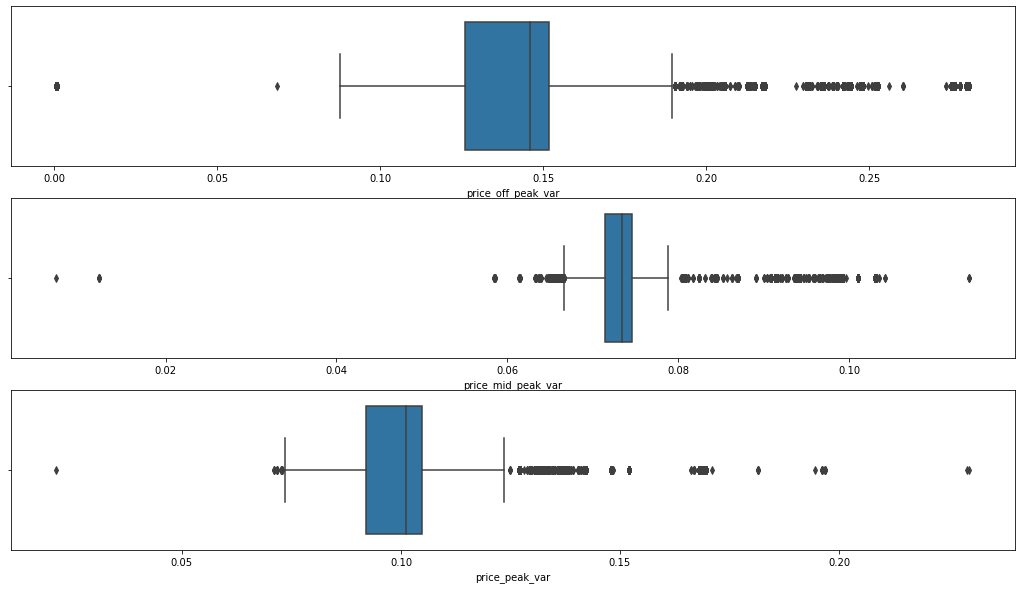

In [10]:
fig, axs = plt.subplots(nrows=3, figsize=(18,10))
# Plot histogram
sns.boxplot(dfPrice["price_off_peak_var"], ax=axs[0])
sns.boxplot(dfPrice["price_mid_peak_var"],ax=axs[1])
sns.boxplot(dfPrice["price_peak_var"], ax=axs[2])
plt.show()

c:\users\aymen\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\aymen\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\aymen\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

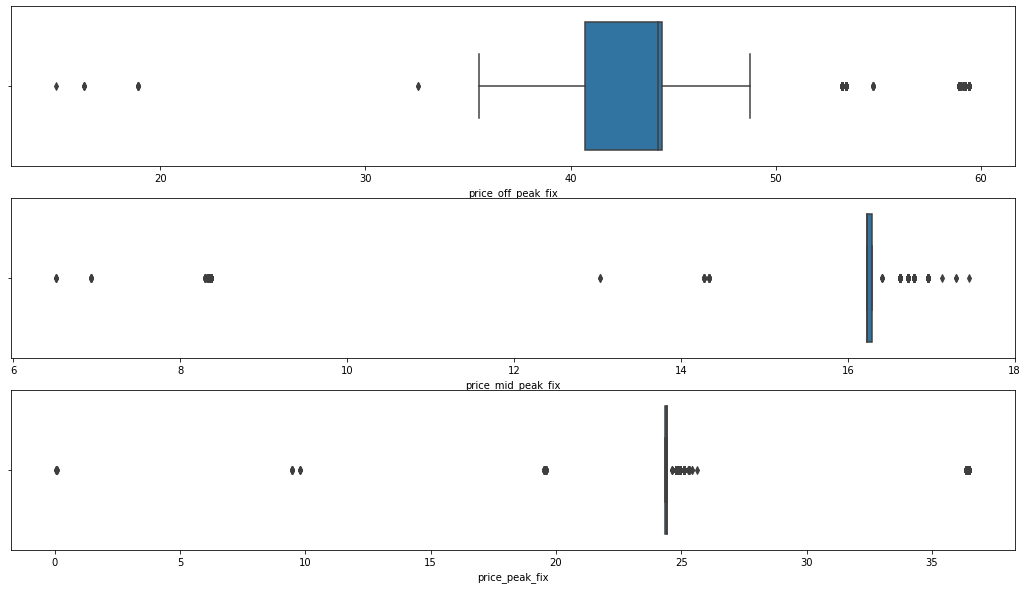

In [11]:
fig, axs = plt.subplots(nrows=3, figsize=(18,10))
# Plot histogram
sns.boxplot(dfPrice["price_off_peak_fix"], ax=axs[0])
sns.boxplot(dfPrice["price_mid_peak_fix"],ax=axs[1])
sns.boxplot(dfPrice["price_peak_fix"], ax=axs[2])
plt.show()

## Summary
- Original dataset contained no null entries
- All price data was recorded on the first of every month
- Price dataset contained no duplicate entries
- Replaced 0s with Null
- Unsure about existence of outliers

----
# Customer Data EDA
----

## Import Dataset

In [13]:
df = pd.read_csv(r'C:\Users\Aymen\Desktop\BCG Forage\Task 2\client_data.csv')

----

## Gain General Understanding of Dataset

In [14]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [16]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [17]:
df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [18]:
df['date_end'] = pd.to_datetime(df['date_end'])
df['date_activ'] = pd.to_datetime(df['date_activ'])

df['date_renewal'] = pd.to_datetime(df['date_renewal'])
df['date_modif_prod'] = pd.to_datetime(df['date_modif_prod'])

### Check For Duplicates

In [19]:
df[df.duplicated(['id'])]

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


#### No duplicates were found in the ID column, operating under the assumption that the same company will not be marked twice with different IDs.

In [20]:
len(df.loc[df['churn'] == 1]) / len(df.loc[df['churn'] == 0])*100

10.760597558201258

#### ~10.76% of companies churn in total.

---
---
# Begin Analysis
---
---

## Pearson Correlation Heatmap

In [21]:
df.corr().style.background_gradient(cmap="Greens")

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
cons_12m,1.000000,0.488474,0.968212,0.193947,0.167093,-0.043282,0.065268,-0.007748,0.145908,-0.026566,0.159711,-0.011926,-0.011905,0.154251,0.133614,-0.003565,0.082889,-0.045968
cons_gas_12m,0.488474,1.000000,0.507007,0.084359,0.080934,-0.012595,0.041393,-0.017684,0.074002,-0.020558,0.077846,0.006868,0.006852,0.239387,0.070867,-0.013815,0.054317,-0.037957
cons_last_month,0.968212,0.507007,1.000000,0.177773,0.193574,-0.040874,0.057476,-0.005187,0.136802,-0.023017,0.187034,-0.011498,-0.011477,0.169099,0.121835,-0.003677,0.074529,-0.045284
forecast_cons_12m,0.193947,0.084359,0.177773,1.000000,0.647727,0.058435,0.305627,-0.135646,0.254056,-0.018477,0.634600,-0.023220,-0.023231,0.055915,0.768537,0.021283,0.393946,0.012949
forecast_cons_year,0.167093,0.080934,0.193574,0.647727,1.000000,0.008518,0.276009,-0.158012,0.251005,-0.044190,0.969395,-0.010759,-0.010727,0.040426,0.464928,0.048248,0.309647,-0.002558
forecast_discount_energy,-0.043282,-0.012595,-0.040874,0.058435,0.008518,1.000000,-0.008388,0.353735,0.059318,0.048024,0.037939,0.241142,0.240421,0.106812,0.079784,-0.070697,-0.005032,0.017026
forecast_meter_rent_12m,0.065268,0.041393,0.057476,0.305627,0.276009,-0.008388,1.000000,-0.579353,0.706376,-0.203089,0.224212,0.183509,0.183566,0.018109,0.275830,0.071558,0.618549,0.044245
forecast_price_energy_off_peak,-0.007748,-0.017684,-0.005187,-0.135646,-0.158012,0.353735,-0.579353,1.000000,-0.330138,0.630377,-0.092535,0.094498,0.094216,0.035093,-0.135107,-0.168095,-0.384397,-0.010837
forecast_price_energy_peak,0.145908,0.074002,0.136802,0.254056,0.251005,0.059318,0.706376,-0.330138,1.000000,-0.242017,0.212317,0.165483,0.165560,0.044141,0.234942,0.080260,0.411532,0.029315
forecast_price_pow_off_peak,-0.026566,-0.020558,-0.023017,-0.018477,-0.044190,0.048024,-0.203089,0.630377,-0.242017,1.000000,-0.011318,-0.061869,-0.061925,-0.005335,-0.072623,-0.120136,-0.095897,0.014778


#### None of the columns show a significant correlation with Churn
----

## Contract Dates and Churn

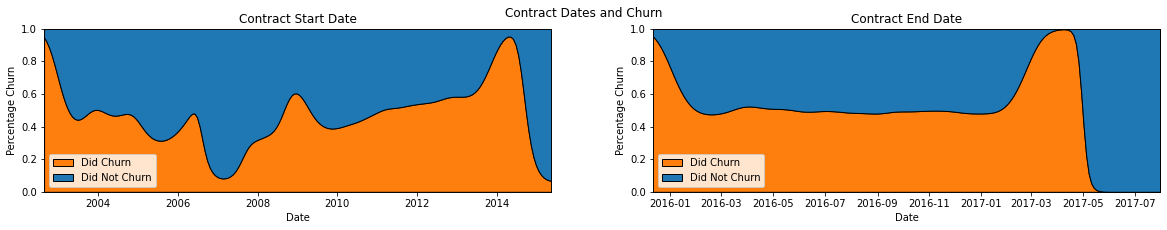

In [22]:
fig, axes = plt.subplots(1, 2, figsize = (20, 3))
fig.suptitle('Contract Dates and Churn')

axes[0].set_title('Contract Start Date')
ax = sns.kdeplot(data=df, x="date_activ", hue="churn", common_norm=False, multiple="fill", alpha=1, legend = True, ax = axes[0])
ax.set(xlabel='Date', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

axes[1].set_title('Contract End Date')
ax = sns.kdeplot(data=df, x="date_end", hue="churn", common_norm=False, multiple="fill", alpha=1, legend = True, ax = axes[1])
ax.set(xlabel='Date', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

#### There is no visual indication of a relationship between a contract's activation date and the possibility of churn.
#### On the other hand, their is visual indication of a potential relationship between date of a contract's end and the possibility of churn.

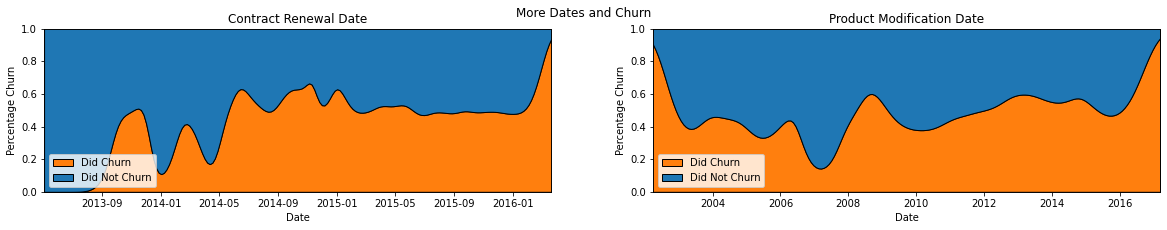

In [23]:
fig, axes = plt.subplots(1, 2, figsize = (20, 3))
fig.suptitle('More Dates and Churn')

axes[0].set_title('Contract Renewal Date')
ax = sns.kdeplot(data=df, x="date_renewal", hue="churn", common_norm=False, multiple="fill", alpha=1, legend = True, ax = axes[0])
ax.set(xlabel='Date', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

axes[1].set_title('Product Modification Date')
ax = sns.kdeplot(data=df, x="date_modif_prod", hue="churn", common_norm=False, multiple="fill", alpha=1, legend = True, ax = axes[1])
ax.set(xlabel='Date', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

#### Potential positive relationship between a contract's renewal date and the rate of churn
#### No visual indication showing a relationship between product modification date and churn.

----
## Effect of Margin on Churn

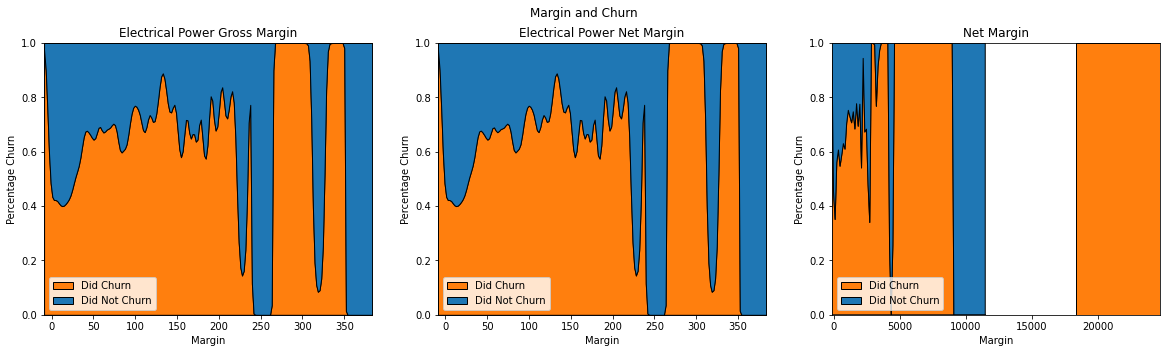

In [24]:
fig, axes = plt.subplots(1, 3, figsize = (20, 5))
fig.suptitle('Margin and Churn')

axes[0].set_title('Electrical Power Gross Margin')
ax = sns.kdeplot(data=df, x='margin_gross_pow_ele', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = True, ax = axes[0])
ax.set(xlabel='Margin', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

axes[1].set_title('Electrical Power Net Margin')
ax = sns.kdeplot(data=df, x='margin_net_pow_ele', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = False, ax = axes[1])
ax.set(xlabel='Margin', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

axes[2].set_title('Net Margin')
ax = sns.kdeplot(data=df, x='net_margin', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = False, ax = axes[2])
ax.set(xlabel='Margin', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

In [25]:
df['net_margin'].loc[df['net_margin'] >15000]

2596    24570.65
Name: net_margin, dtype: float64

#### No indication of potential correlation between margin and churn.

----
## Consumption and  Churn

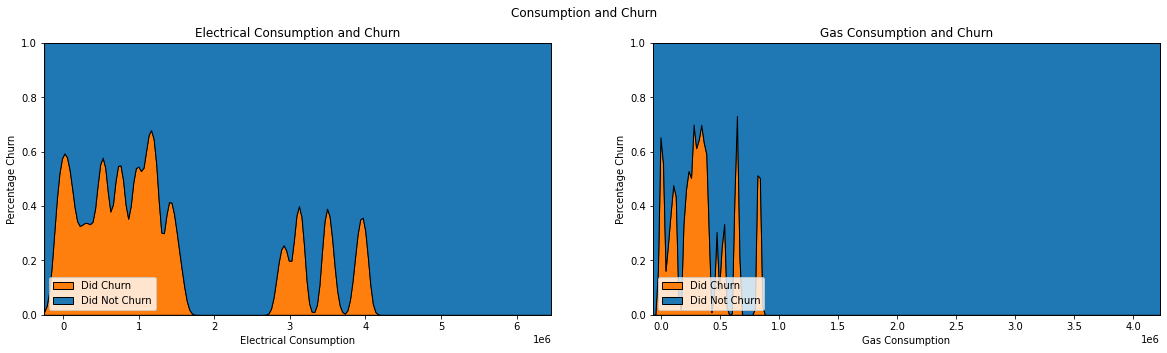

In [26]:
fig, axes = plt.subplots(1, 2, figsize = (20, 5))
fig.suptitle('Consumption and Churn')

axes[0].set_title('Electrical Consumption and Churn')
ax = sns.kdeplot(data=df, x='cons_12m', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = True, ax = axes[0])
ax.set(xlabel='Electrical Consumption', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

axes[1].set_title('Gas Consumption and Churn')
ax = sns.kdeplot(data=df, x='cons_gas_12m', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = False, ax = axes[1])
ax.set(xlabel='Gas Consumption', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

#### Possible relationship showcasing high consumption and a decreased risk of churn.

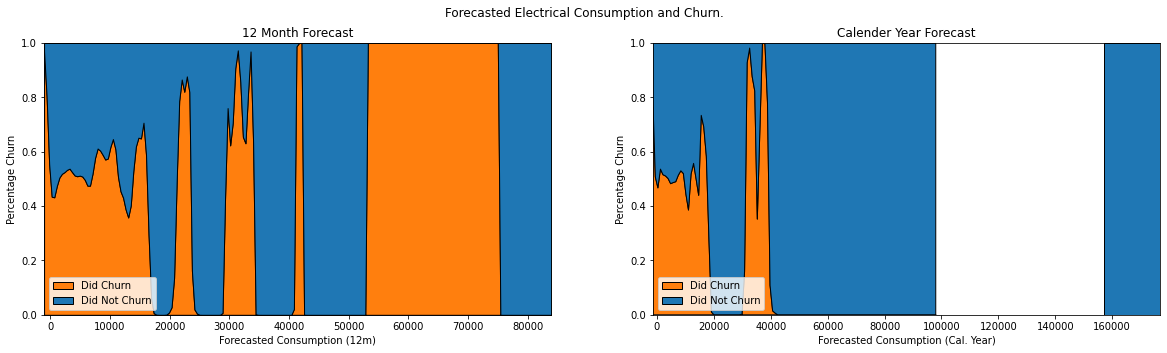

In [27]:
fig, axes = plt.subplots(1, 2, figsize = (20, 5))
fig.suptitle('Forecasted Electrical Consumption and Churn.')

axes[0].set_title('12 Month Forecast')
ax = sns.kdeplot(data=df, x='forecast_cons_12m', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = True, ax = axes[0])
ax.set(xlabel='Forecasted Consumption (12m)', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

axes[1].set_title('Calender Year Forecast')
ax = sns.kdeplot(data=df, x='forecast_cons_year', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = False, ax = axes[1])
ax.set(xlabel='Forecasted Consumption (Cal. Year)', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

#### Large discrepency between these two graphs, more analysis needs to be performed on this data before further use.

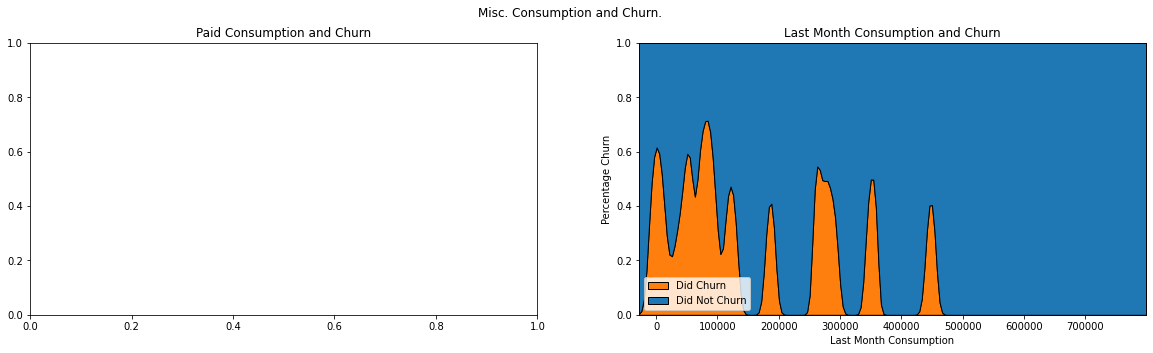

In [28]:
fig, axes = plt.subplots(1, 2, figsize = (20, 5))
fig.suptitle('Misc. Consumption and Churn.')

axes[0].set_title('Paid Consumption and Churn')
ax = sns.kdeplot(data=df, x='imp_cons', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = False, ax = axes[1])
ax.set(xlabel='Paid Consumption', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

axes[1].set_title('Last Month Consumption and Churn')
ax = sns.kdeplot(data=df, x='cons_last_month', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = False, ax = axes[1])
ax.set(xlabel='Last Month Consumption', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

#### Issue with paid consumption visualization, high last month consumption could lead to a decreased risk of churn

## Final Numerical Visualizations

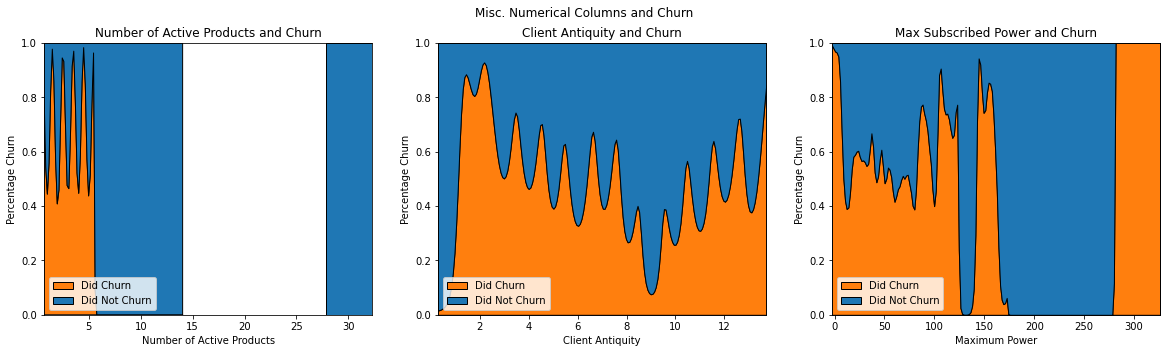

In [29]:
fig, axes = plt.subplots(1, 3, figsize = (20, 5))
fig.suptitle('Misc. Numerical Columns and Churn')

axes[0].set_title('Number of Active Products and Churn')
ax = sns.kdeplot(data=df, x='nb_prod_act', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = True, ax = axes[0])
ax.set(xlabel='Number of Active Products', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

axes[1].set_title('Client Antiquity and Churn')
ax = sns.kdeplot(data=df, x='num_years_antig', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = False, ax = axes[1])
ax.set(xlabel='Client Antiquity', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

axes[2].set_title('Max Subscribed Power and Churn')
ax = sns.kdeplot(data=df, x='pow_max', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = False, ax = axes[2])
ax.set(xlabel='Maximum Power', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

#### Count of active products could have a negative relationship with churn.
#### No indication of other relationships.

----
# Categorical Visualizations
----

[Text(0.5, 0, 'Sales CHannel'),
 Text(0, 0.5, 'Percentage Churn'),
 Text(0.5, 1.0, 'Sales Channel and Churn')]

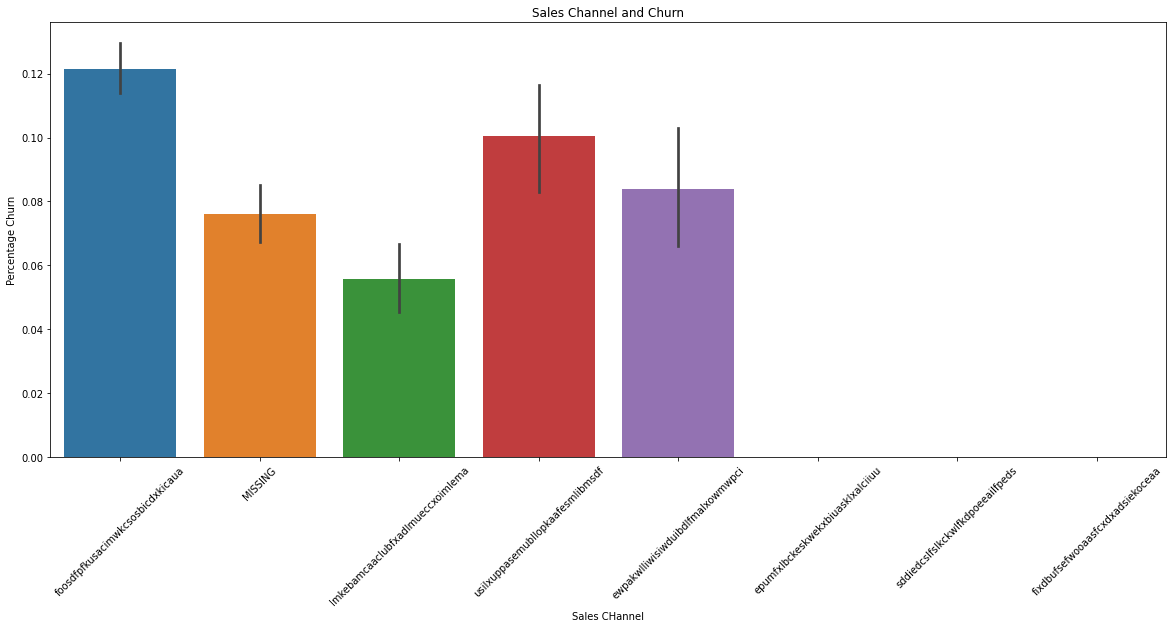

In [30]:
plt.figure(figsize = (20,8))

ax = sns.barplot(data = df, x = 'channel_sales', y = 'churn')
plt.xticks(rotation=45)
ax.set(xlabel='Sales Channel', ylabel='Percentage Churn', title='Sales Channel and Churn')

[Text(0.5, 0, 'Electricity Campaign Code'),
 Text(0, 0.5, 'Percentage Churn'),
 Text(0.5, 1.0, 'Campaign Code and Churn')]

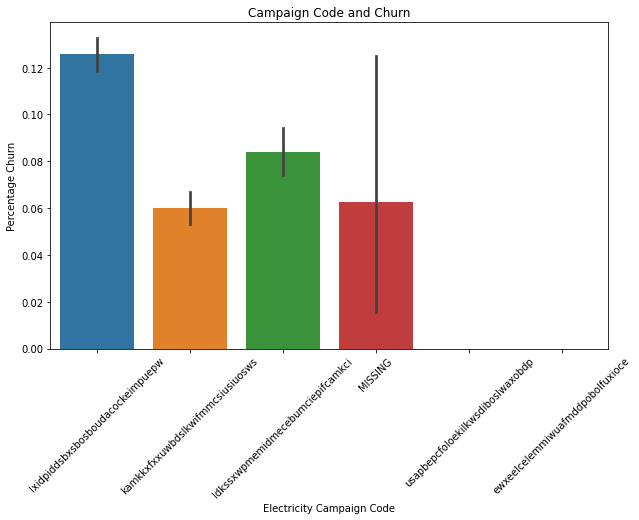

In [31]:
plt.figure(figsize = (10, 6))

ax = sns.barplot(data = df, x = 'origin_up', y = 'churn')
plt.xticks(rotation=45)
ax.set(xlabel='Electricity Campaign Code', ylabel='Percentage Churn', title='Campaign Code and Churn')

#### Both Sales Channel and Campagin Code potentially affect churn rates.

[Text(0, 0, 'True'), Text(1, 0, 'False')]

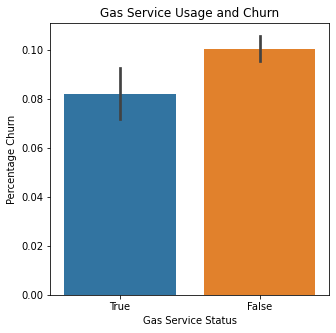

In [32]:
plt.figure(figsize = (5,5))

ax = sns.barplot(data = df, x = 'has_gas', y = 'churn')
ax.set(xlabel='Gas Service Status', ylabel='Percentage Churn', title='Gas Service Usage and Churn')
ax.set_xticklabels(['True', 'False'])

#### Subscription to gas service may decrease the risk of churn.

----
# Forecasts and Churn
----

## Peak Price Forecasts and Churn

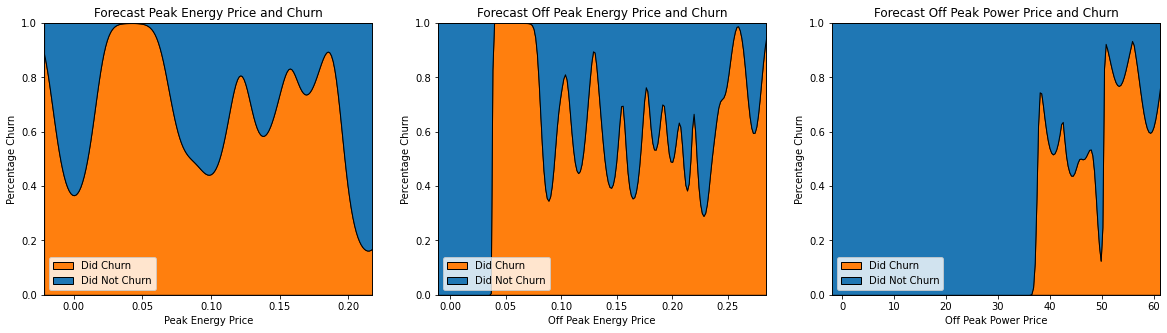

In [33]:
fig, axes = plt.subplots(1, 3, figsize = (20, 5))
# fig.suptitle('Peak Price Forec')

axes[0].set_title('Forecast Peak Energy Price and Churn')
ax = sns.kdeplot(data=df, x='forecast_price_energy_peak', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = True, ax = axes[0])
ax.set(xlabel='Peak Energy Price', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])
    
axes[1].set_title('Forecast Off Peak Energy Price and Churn')
ax = sns.kdeplot(data=df, x='forecast_price_energy_off_peak', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = False, ax = axes[1])
ax.set(xlabel='Off Peak Energy Price', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

axes[2].set_title('Forecast Off Peak Power Price and Churn')
ax = sns.kdeplot(data=df, x='forecast_price_pow_off_peak', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = False, ax = axes[2])
ax.set(xlabel='Off Peak Power Price', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

#### Off peak power shows a potential relationship with churn.

## Misc. Forecasts and Churn

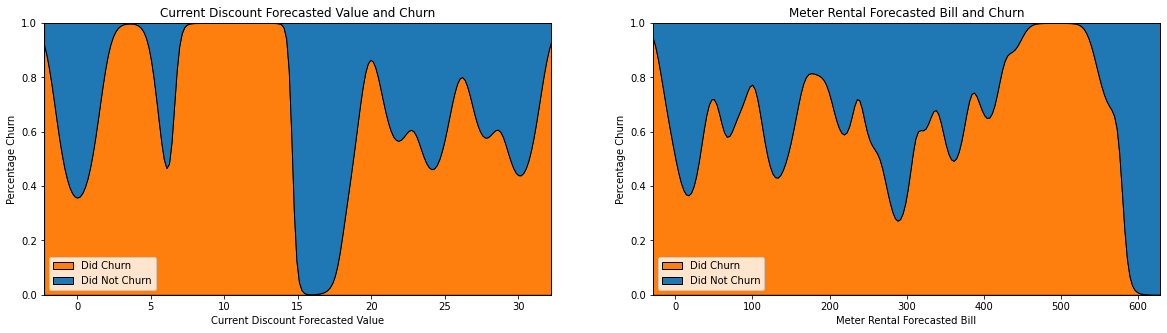

In [34]:
fig, axes = plt.subplots(1, 2, figsize = (20, 5))
# fig.suptitle('Peak Price Forec')

axes[0].set_title('Current Discount Forecasted Value and Churn')
ax = sns.kdeplot(data=df, x='forecast_discount_energy', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = True, ax = axes[0])
ax.set(xlabel='Current Discount Forecasted Value', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])
    
axes[1].set_title('Meter Rental Forecasted Bill and Churn')
ax = sns.kdeplot(data=df, x='forecast_meter_rent_12m', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = False, ax = axes[1])
ax.set(xlabel='Meter Rental Forecasted Bill', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

#### No visual patterns suggesting a relationship with churn.

---
# Price Columns and Churn
---

In [39]:
# Delete all client columns except for id and churn
dfChurn = df[['id', 'churn']]

# Right Join all companies with their 2015 prices
dfPnC = pd.merge(dfChurn, dfPrice, on='id',how='inner')
print(len(dfChurn))
print(len(dfPrice))
print(len(dfPnC))

14606
193002
175149


#### Some pricing data has a customer ID that is not found in the customer dataset.

## Variable Price and Churn

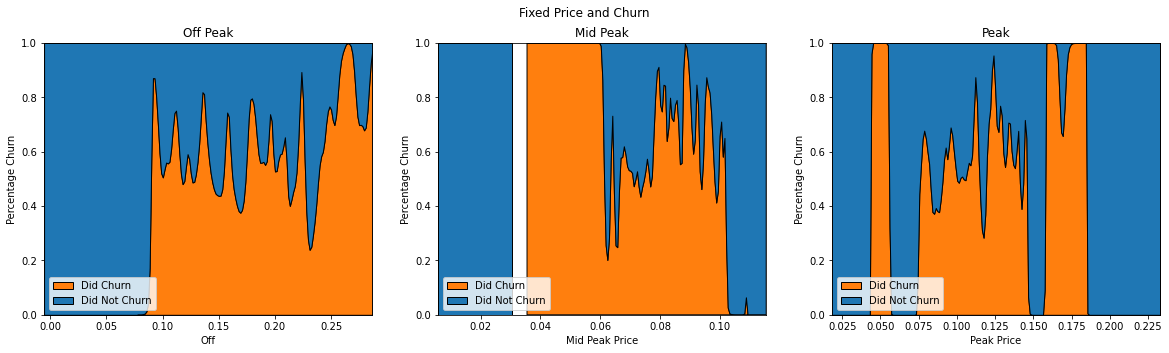

In [40]:
fig, axes = plt.subplots(1, 3, figsize = (20, 5))
fig.suptitle('Fixed Price and Churn')

axes[0].set_title('Off Peak')
ax = sns.kdeplot(data=dfPnC, x='price_off_peak_var', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = True, ax = axes[0])
ax.set(xlabel='Off', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])
    
axes[1].set_title('Mid Peak')
ax = sns.kdeplot(data=dfPnC, x='price_mid_peak_var', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = False, ax = axes[1])
ax.set(xlabel='Mid Peak Price', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

axes[2].set_title('Peak')
ax = sns.kdeplot(data=dfPnC, x='price_peak_var', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = False, ax = axes[2])
ax.set(xlabel='Peak Price', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

## Fixed Price and Churn

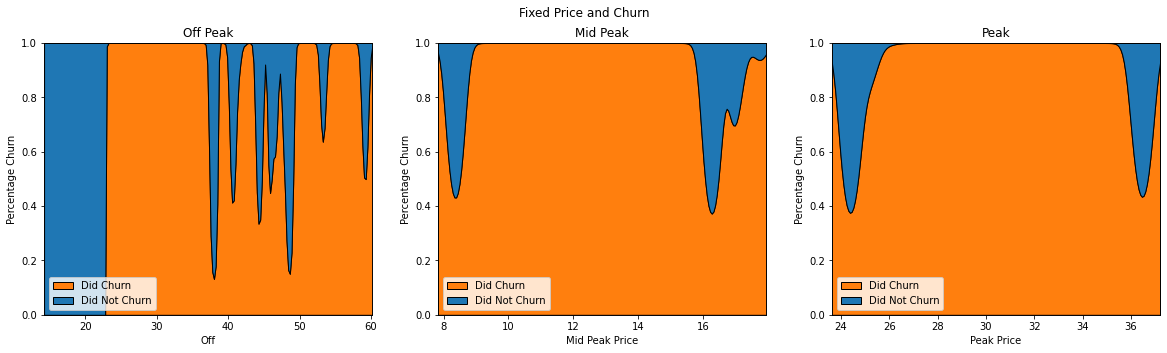

In [41]:
fig, axes = plt.subplots(1, 3, figsize = (20, 5))
fig.suptitle('Fixed Price and Churn')

axes[0].set_title('Off Peak')
ax = sns.kdeplot(data=dfPnC, x='price_off_peak_fix', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = True, ax = axes[0])
ax.set(xlabel='Off', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])
    
axes[1].set_title('Mid Peak')
ax = sns.kdeplot(data=dfPnC, x='price_mid_peak_fix', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = False, ax = axes[1])
ax.set(xlabel='Mid Peak Price', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

axes[2].set_title('Peak')
ax = sns.kdeplot(data=dfPnC, x='price_peak_fix', hue="churn", common_norm=False, multiple="fill", alpha=1, legend = False, ax = axes[2])
ax.set(xlabel='Peak Price', ylabel='Percentage Churn')
ax.legend(loc='lower left', labels=['Did Churn', 'Did Not Churn'])

#### No clear indication showing relationship between Fixed or Variable Prices with Churn Rate